<a href="https://colab.research.google.com/github/SANDRAJACOB1/CognoRise-Infotech/blob/main/CognoRise_Titanic_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING NECESSARY LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**LOADING DATAFRAME**

In [ ]:
df=pd.read_csv('/content/tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


**DATA PREPROCESSING**

In [ ]:
#Printing the first five rows of the dataframe

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
#Printing the last five rows of the dataframe

df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [ ]:
#Printing the shape of the dataframe

df.shape

(418, 12)

In [ ]:
#Printing the column names of the dataframe

df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
#Printing summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
#Describing the dataframe

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
#Printing the dataype of each column of the dataframe

df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [ ]:
#Checking for missing values in each column of the dataframe

df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
#Filling missing values in each column of the dataframe

df['Age']=df['Age'].fillna(df['Age'].mode()[0])
df['Fare']=df['Fare'].fillna(df['Fare'].mean())
df['Cabin']=df['Cabin'].fillna(df['Cabin'].mode()[0])
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
#Dropping unneeded columns from the dataframe

df.drop(['PassengerId','Name'],axis=1,inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,34.5,0,0,330911,7.8292,B57 B59 B63 B66,Q
1,1,3,female,47.0,1,0,363272,7.0000,B57 B59 B63 B66,S
2,0,2,male,62.0,0,0,240276,9.6875,B57 B59 B63 B66,Q
3,0,3,male,27.0,0,0,315154,8.6625,B57 B59 B63 B66,S
4,1,3,female,22.0,1,1,3101298,12.2875,B57 B59 B63 B66,S
...,...,...,...,...,...,...,...,...,...,...
413,0,3,male,21.0,0,0,A.5. 3236,8.0500,B57 B59 B63 B66,S
414,1,1,female,39.0,0,0,PC 17758,108.9000,C105,C
415,0,3,male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,B57 B59 B63 B66,S
416,0,3,male,21.0,0,0,359309,8.0500,B57 B59 B63 B66,S


**DATA VISUALISATION**

In [ ]:
#Checking how a column is related to another columns using Correlaion


df.corr(numeric_only=True)

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.108615,0.021962,0.099943,0.159120,0.191382
Pclass,-0.108615,1.000000,-0.503026,0.001087,0.018721,-0.576619
Age,0.021962,-0.503026,1.000000,-0.054656,-0.040213,0.366824
SibSp,0.099943,0.001087,-0.054656,1.000000,0.306895,0.171488
Parch,0.159120,0.018721,-0.040213,0.306895,1.000000,0.230001
Fare,0.191382,-0.576619,0.366824,0.171488,0.230001,1.000000


<Axes: >

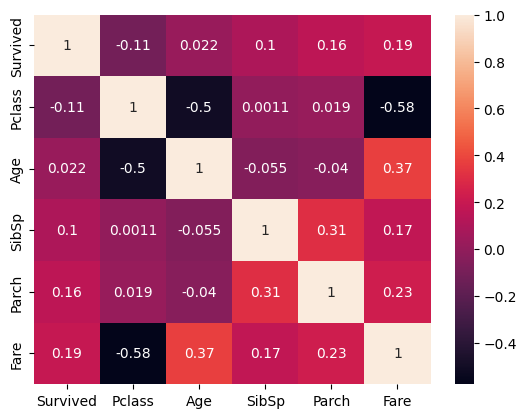

In [ ]:
#To represent correlation graphically; we use heatmap

sns.heatmap(df.corr(numeric_only=True),annot=True)

<Axes: xlabel='Pclass', ylabel='count'>

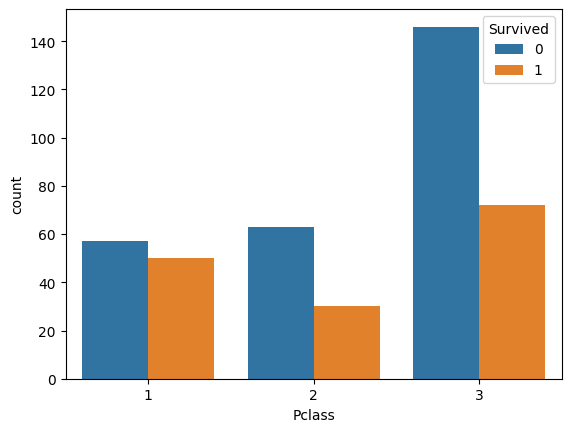

In [ ]:
#Count plot

sns.countplot(x='Pclass',data=df,hue='Survived')

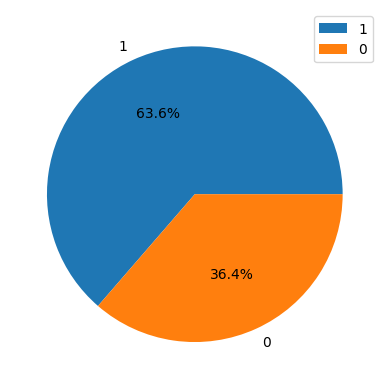

In [ ]:
#Piechart

y=df['Survived'].value_counts()
values=['1','0']
plt.pie(y,labels=values,autopct='%1.1f%%')
plt.legend()

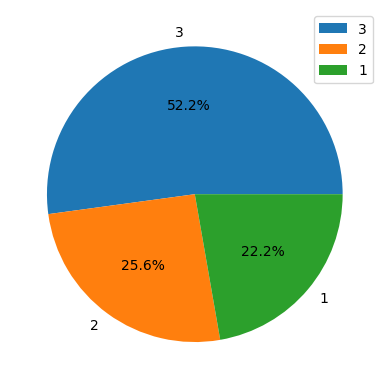

In [ ]:
#Piechart

y=df['Pclass'].value_counts()
values=['3','2','1']
plt.pie(y,labels=values,autopct='%1.1f%%')
plt.legend()

**ENCODING USING LABEL ENCODER**

In [ ]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

df['Sex']=lb.fit_transform(df['Sex'])
df['Cabin']=lb.fit_transform(df['Cabin'])
df['Ticket']=lb.fit_transform(df['Ticket'])
df['Embarked']=lb.fit_transform(df['Embarked'])
df.dtypes

Survived      int64
Pclass        int64
Sex           int64
Age         float64
SibSp         int64
Parch         int64
Ticket        int64
Fare        float64
Cabin         int64
Embarked      int64
dtype: object

**SEPERATING INPUT AND OUTPUT DATAS**

In [ ]:
x=df.drop(['Survived'],axis=1).values
x

array([[ 3.    ,  1.    , 34.5   , ...,  7.8292, 15.    ,  1.    ],
       [ 3.    ,  0.    , 47.    , ...,  7.    , 15.    ,  2.    ],
       [ 2.    ,  1.    , 62.    , ...,  9.6875, 15.    ,  1.    ],
       ...,
       [ 3.    ,  1.    , 38.5   , ...,  7.25  , 15.    ,  2.    ],
       [ 3.    ,  1.    , 21.    , ...,  8.05  , 15.    ,  2.    ],
       [ 3.    ,  1.    , 21.    , ..., 22.3583, 15.    ,  0.    ]])

In [ ]:
y=df['Survived'].values
y

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

**SPLITTING TRAINING AND TESTING DATAS**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train

array([[  1.    ,   1.    ,  36.    , ...,  75.2417,  38.    ,   0.    ],
       [  3.    ,   1.    ,  21.    , ...,   7.75  ,  15.    ,   1.    ],
       [  1.    ,   0.    ,  63.    , ..., 221.7792,  37.    ,   2.    ],
       ...,
       [  1.    ,   1.    ,  46.    , ...,  75.2417,  38.    ,   0.    ],
       [  2.    ,   1.    ,  24.    , ...,  13.5   ,  15.    ,   2.    ],
       [  3.    ,   1.    ,  21.    , ...,   7.75  ,  15.    ,   1.    ]])

In [ ]:
x_test

array([[  3.    ,   1.    ,  25.    , ...,   7.2292,  70.    ,   0.    ],
       [  1.    ,   0.    ,  39.    , ..., 211.3375,  15.    ,   2.    ],
       [  3.    ,   1.    ,  21.    , ...,   7.75  ,  15.    ,   1.    ],
       ...,
       [  3.    ,   1.    ,  21.    , ...,  21.6792,  15.    ,   0.    ],
       [  3.    ,   1.    ,  33.    , ...,   7.8542,  15.    ,   2.    ],
       [  1.    ,   1.    ,  23.    , ...,  93.5   ,   8.    ,   2.    ]])

In [ ]:
y_train

array([0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0])

In [ ]:
y_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0])

**NORMALIZATION USING MINMAX SCALER**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler()
scalar.fit(x_train)
x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)
x_train

array([[0.        , 1.        , 0.47138893, ..., 0.14686202, 0.50666667,
        0.        ],
       [1.        , 1.        , 0.27315977, ..., 0.01512699, 0.2       ,
        0.5       ],
       [0.        , 0.        , 0.8282014 , ..., 0.43288417, 0.49333333,
        1.        ],
       ...,
       [0.        , 1.        , 0.60354169, ..., 0.14686202, 0.50666667,
        0.        ],
       [0.5       , 1.        , 0.3128056 , ..., 0.02635025, 0.2       ,
        1.        ],
       [1.        , 1.        , 0.27315977, ..., 0.01512699, 0.2       ,
        0.5       ]])

**MODEL CREATION**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
knn=KNeighborsClassifier(n_neighbors=7)
multi=MultinomialNB()
tree=DecisionTreeClassifier(criterion='entropy')
forest=RandomForestClassifier(n_estimators=100,random_state=42)
# xgb=XGBClassifier()
linear=LogisticRegression()
lst=[knn,multi,tree,forest,linear]

**PERFORMANCE EVALUATION**

In [ ]:
for i in lst:
  print("Model Started")
  print(i)
  print("*"*50)
  i.fit(x_train,y_train)
  print("The Predicted values are")
  y_pred=i.predict(x_test)
  print(y_pred)
  print("Testing values are")
  print(y_test)
  print("Confusion matrics is")
  print(confusion_matrix(y_test,y_pred))
  print("Accuracy score is")
  print(accuracy_score(y_test,y_pred))
  print("Performance Evaluations is")
  print(classification_report(y_test,y_pred))
  print("*"*50)

Model Started
KNeighborsClassifier(n_neighbors=7)
**************************************************
The Predicted values are
[0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0]
Testing values are
[0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0]
Confusion matrics is
[[85  0]
 [ 0 41]]
Accuracy score is
1.0
Performance Evaluations is
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00 